<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [4016]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from tensorflow.keras import regularizers

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,f1_score,accuracy_score, recall_score, precision_score

import time
import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4019]:
df = pd.read_csv("bank-1.csv")

## Data Overview

In [4022]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4024]:
df.shape

(10000, 14)

In [4026]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4028]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4030]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no null values in the dataset.

In [4033]:
df.duplicated().sum()

0

* There are no duplicate rows in the dataset.

In [4036]:
df['RowNumber'].nunique()

10000

* RowNumber is unique to each row and therefore can be dropped when running our analysis.

In [4039]:
df['CustomerId'].nunique()

10000

* CustomerId is unique to each row and therefore can be dropped when running our analysis.

In [4042]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


* Average Credit Score is 652, 25th percentile is 584 and 75th percentile is 718.
* Average Age is 37, 25th percentile is 32 and 75th percentile is 44.
* Average Tenure is 5 years, 25th percentile is 3 years and 75th percentile is 7 years.
* Average Balance is 97198.54, 25th percentile is 0 and 75th percentile is 127644.2.
* Average Number of Products is 1, 25th percentile is 1 and 75th percentile is 2.
* Average Estimated Salary for the customers is 100193.9, 25th percentile is 51002.11 and 75th percentile is 149388.2

In [4045]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

- The dataset consists of about 4 times the customers that have not exited than those who have exited.  

## Exploratory Data Analysis

### Univariate Analysis

In [4050]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [4052]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

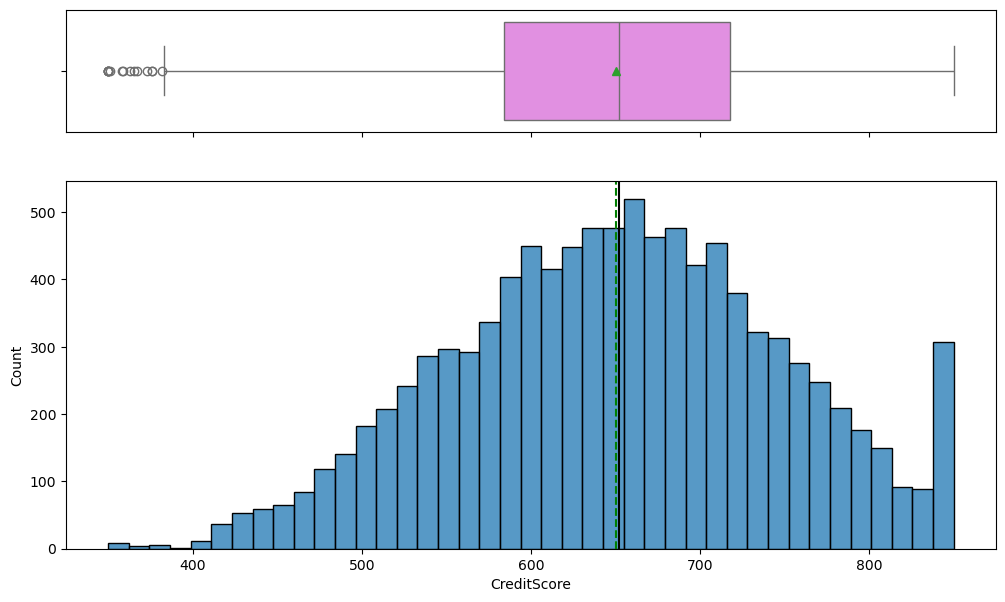

In [4054]:
# Plotting the histogram and box plot for CreditScore
histogram_boxplot(df, 'CreditScore')

- The distribution is slightly skewed to the left.
- There are a few outliers (below ~390)
- The average credit score is around 652.
- 50% of the customers have a credit score between ~ 580 and 720.

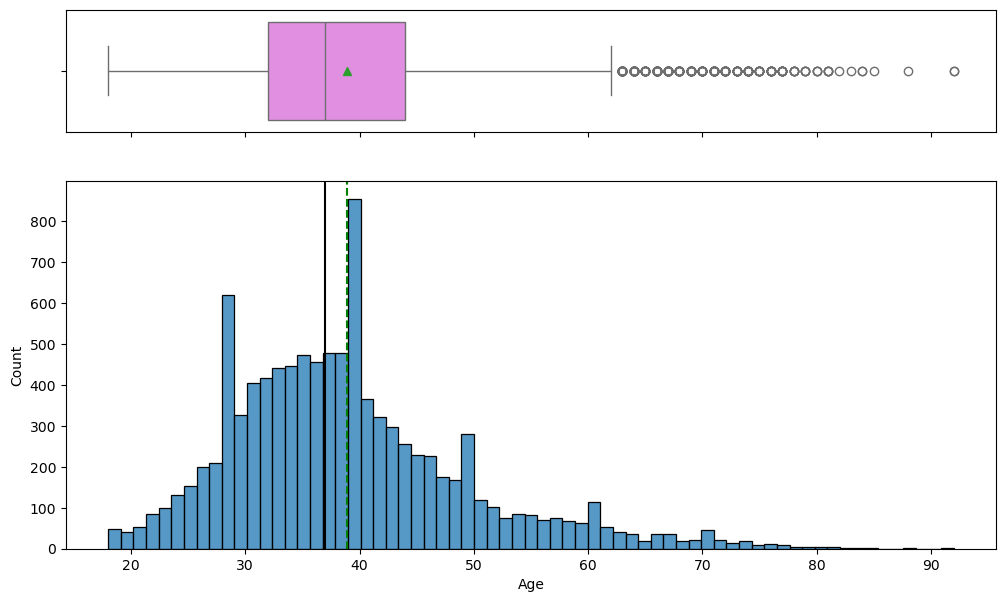

In [4057]:
# Plotting the histogram and box plot for Age
histogram_boxplot(df, 'Age')

- The distribution is skewed to the right.
- Average Age is 37, 25th percentile is 32 and 75th percentile is 44.
- There are outliers - above 62 years of age.

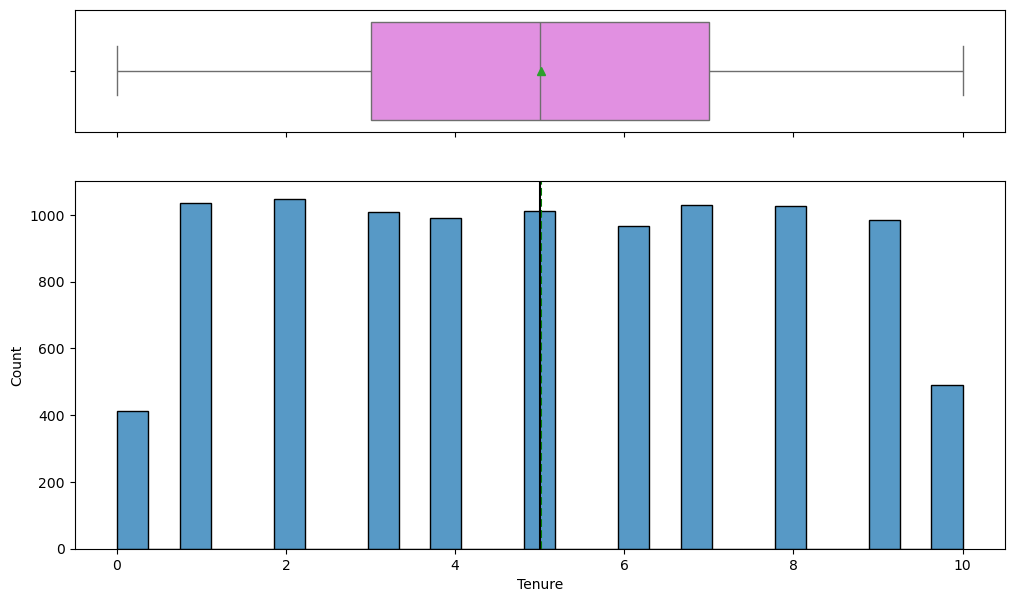

In [4060]:
# Plotting the histogram and box plot for Tenure
histogram_boxplot(df, 'Tenure')

- The distribution is more or less even, with the fewest customer with 0 years or more than 10 years as tenure.
- 50% percentile of customers have been with the bank for 5 years.

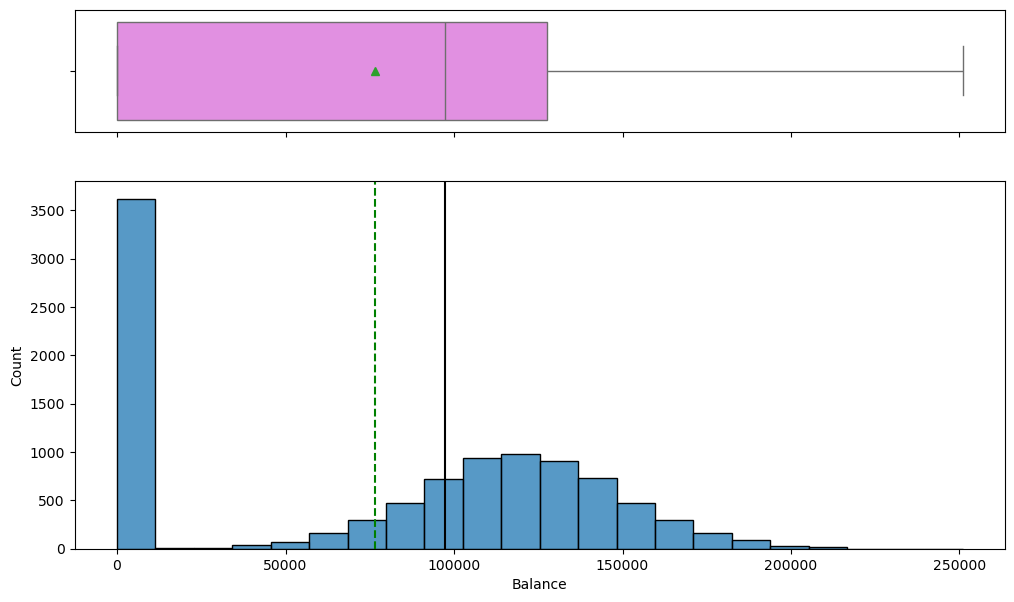

In [4063]:
# Plotting the histogram and box plot for Balance
histogram_boxplot(df, 'Balance')

- There are more than 3500 customers who have 0 balance. Normal distribution for rest of the population.
- Average balance is around 75000, the 0 balance probably pulls it closer towards left.
- 50th percentile is close to 100000.

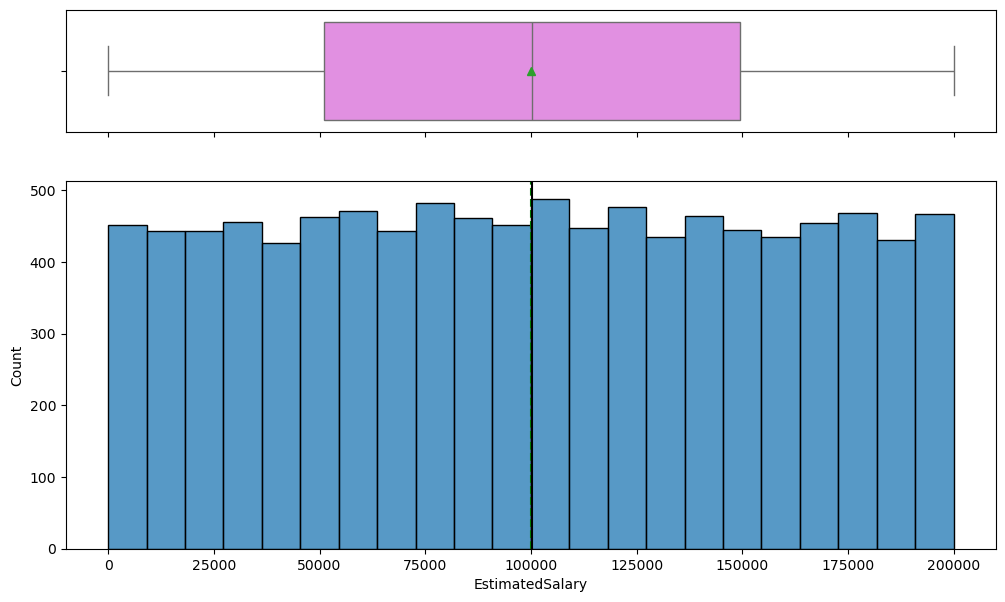

In [4066]:
# Plotting the histogram and box plot for EstimatedSalary
histogram_boxplot(df, 'EstimatedSalary')

- Salary seems to be evenly distributed.
- There are no outliers
- The average salary and the 50th percentile is 100000.
- 50% of the customers have an estimated salary between 50000 and 150000.

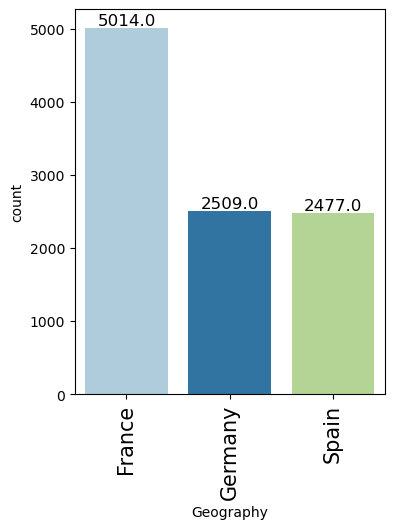

In [4069]:
# Bar plot for Geography
labeled_barplot(df, 'Geography')

- Majority of the customers are from France.
- Germany and Spain represent about the same number of customers.

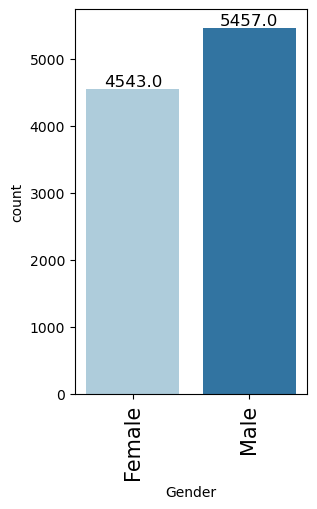

In [4072]:
# Bar plot for Gender
labeled_barplot(df, 'Gender')

- There are 914 more male customers than female customers.

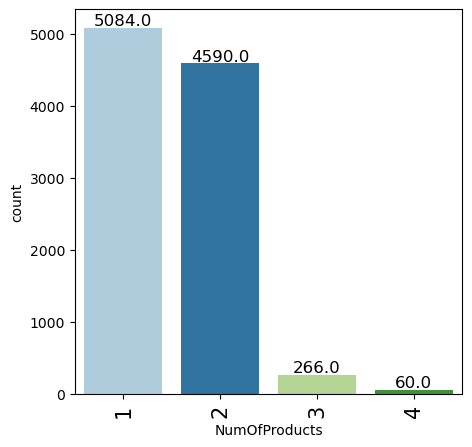

In [4078]:
# Bar plot for NumOfProducts
labeled_barplot(df, 'NumOfProducts')

- Majority of the customers have only 1 product.
- There are 5084 customers with 1 product, 4590 customers with 2, 266 customers with 3 and 60 customers with 4 products.

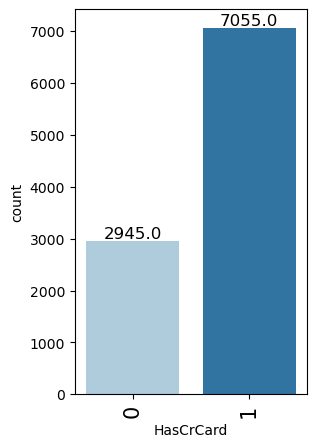

In [4081]:
# Bar plot for HasCrCard
labeled_barplot(df, 'HasCrCard')

- About 70% of the customers have a credit card.

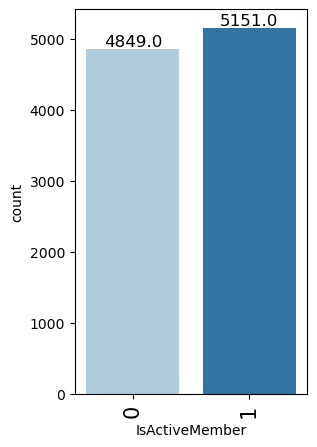

In [4084]:
# Bar plot for IsActiveMember
labeled_barplot(df, 'IsActiveMember')

- Close to half the customers are inactive.

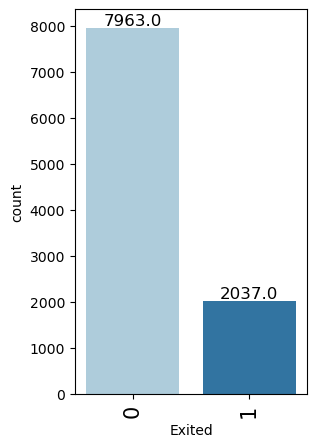

In [4087]:
# Bar plot for Exited
labeled_barplot(df, 'Exited')

- Dataset seems to be imbalanced. The number of customers who have not exited is about 4 times that of exited customers.

### Bivariate Analysis

In [4091]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [4093]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

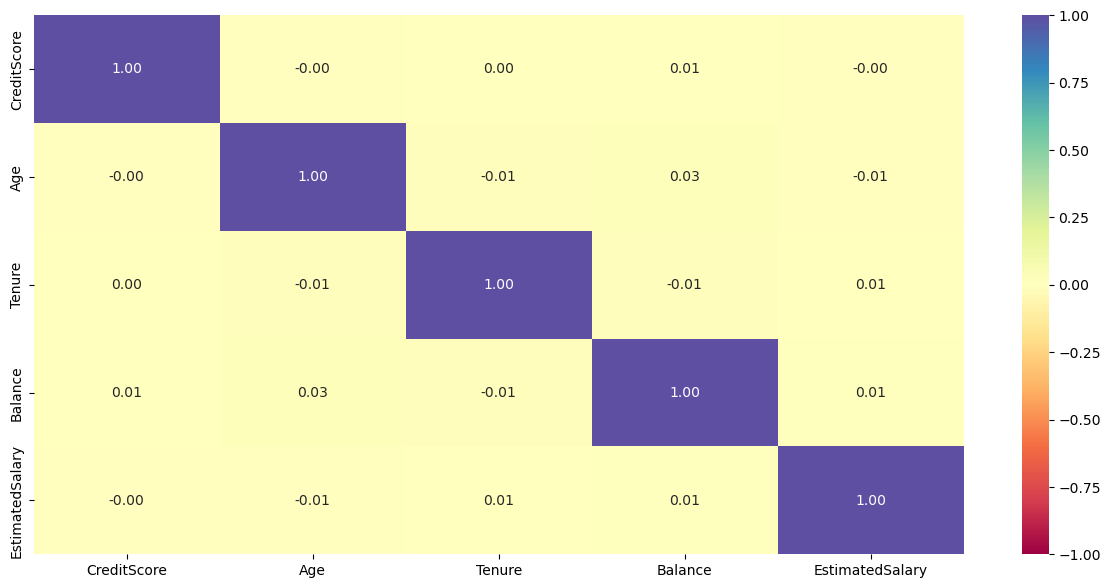

In [4095]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
#plotting the correlation plot
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There does not seem to be any obvious correlation between these variables.
- The greaest correlation here is between Age and Balance.

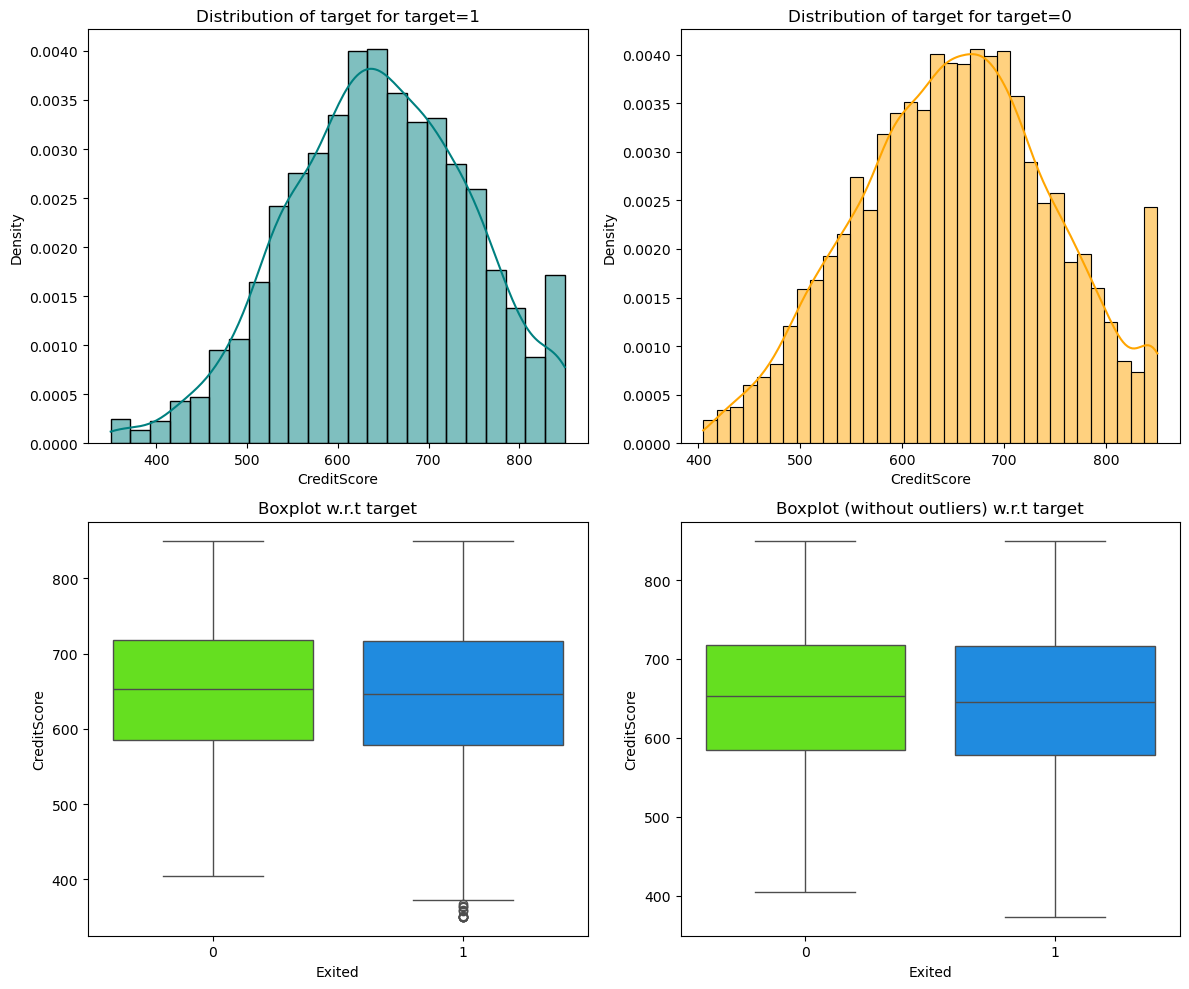

In [4098]:
distribution_plot_wrt_target(df, "CreditScore", "Exited" )

- The average credit score for those who exited and those who did not is around 650, with that of those who exited being very slightly lower.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


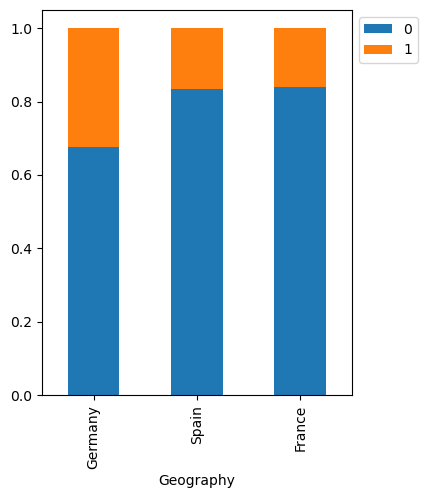

In [4101]:
stacked_barplot(df, "Geography", "Exited" )

- The above graph depicts that the highest percentage of those who exited is for customers from Germany.

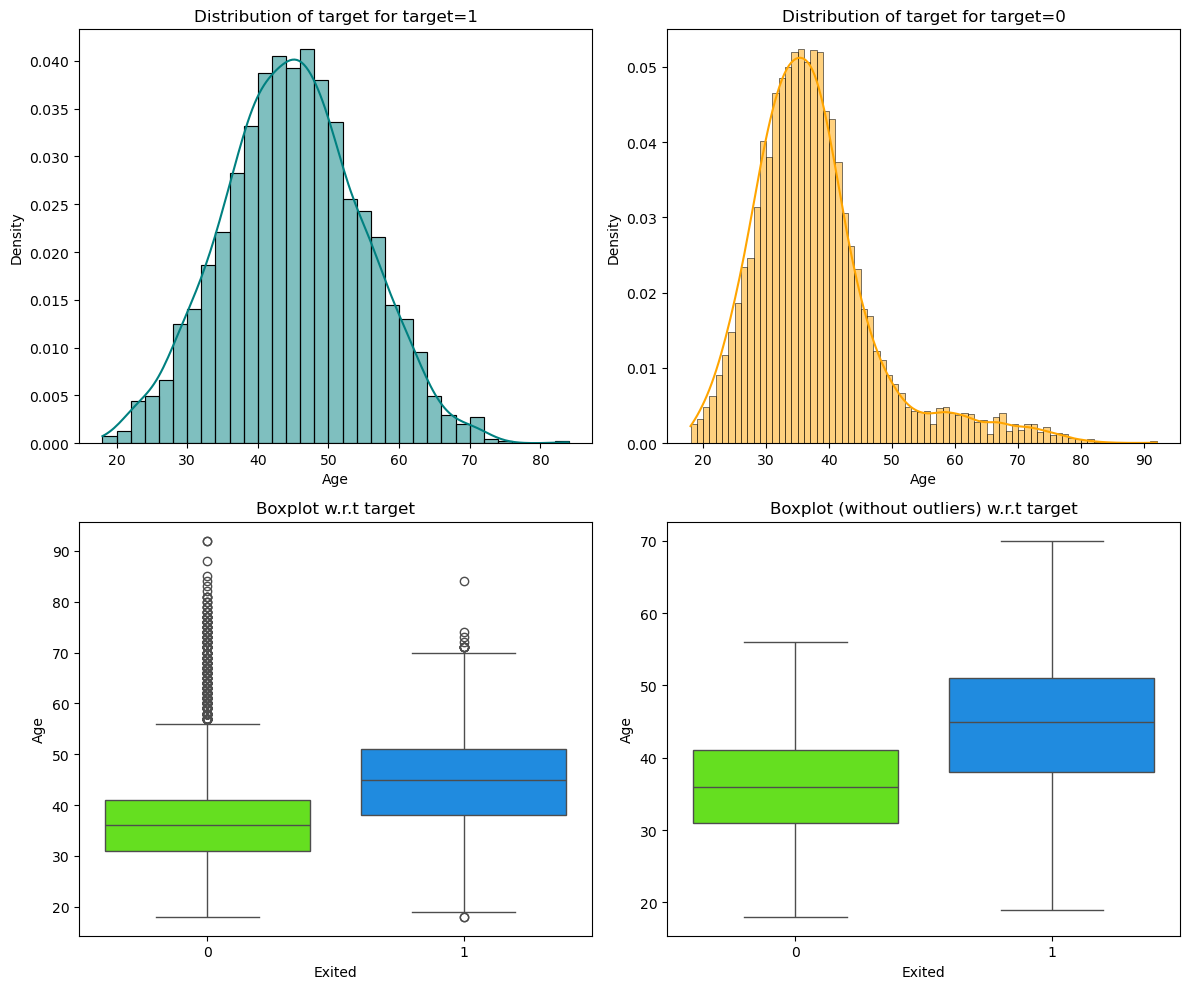

In [4104]:
distribution_plot_wrt_target(df, "Age", "Exited" )

- The average age of customers who exited is higher than those who did not exit.
- The average age for customers who exited is around 45 and for those who did not is around 35.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


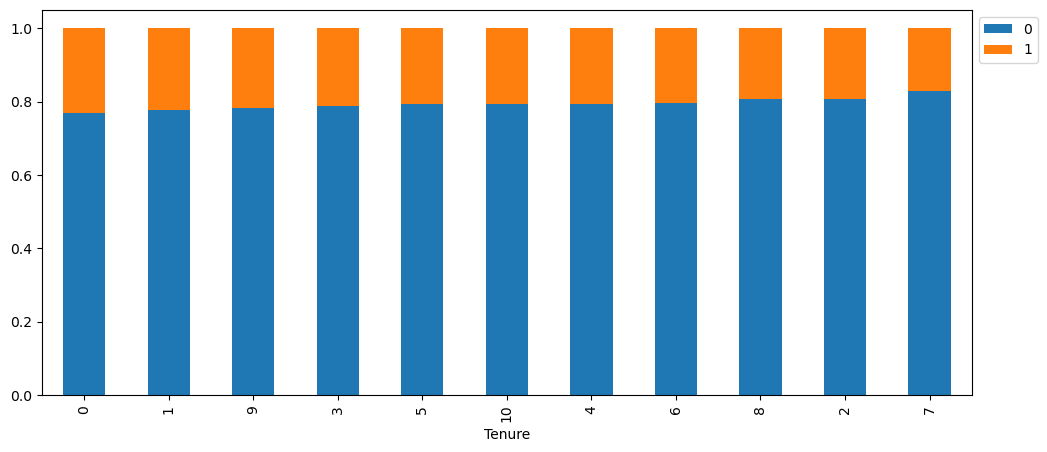

In [4106]:
stacked_barplot(df, "Tenure", "Exited" )

- The tenure of the customer does not seem to have a major effect on whether or not the customer left the bank within the six month period, though those with a tenure under a year seem to have the highest percentage.

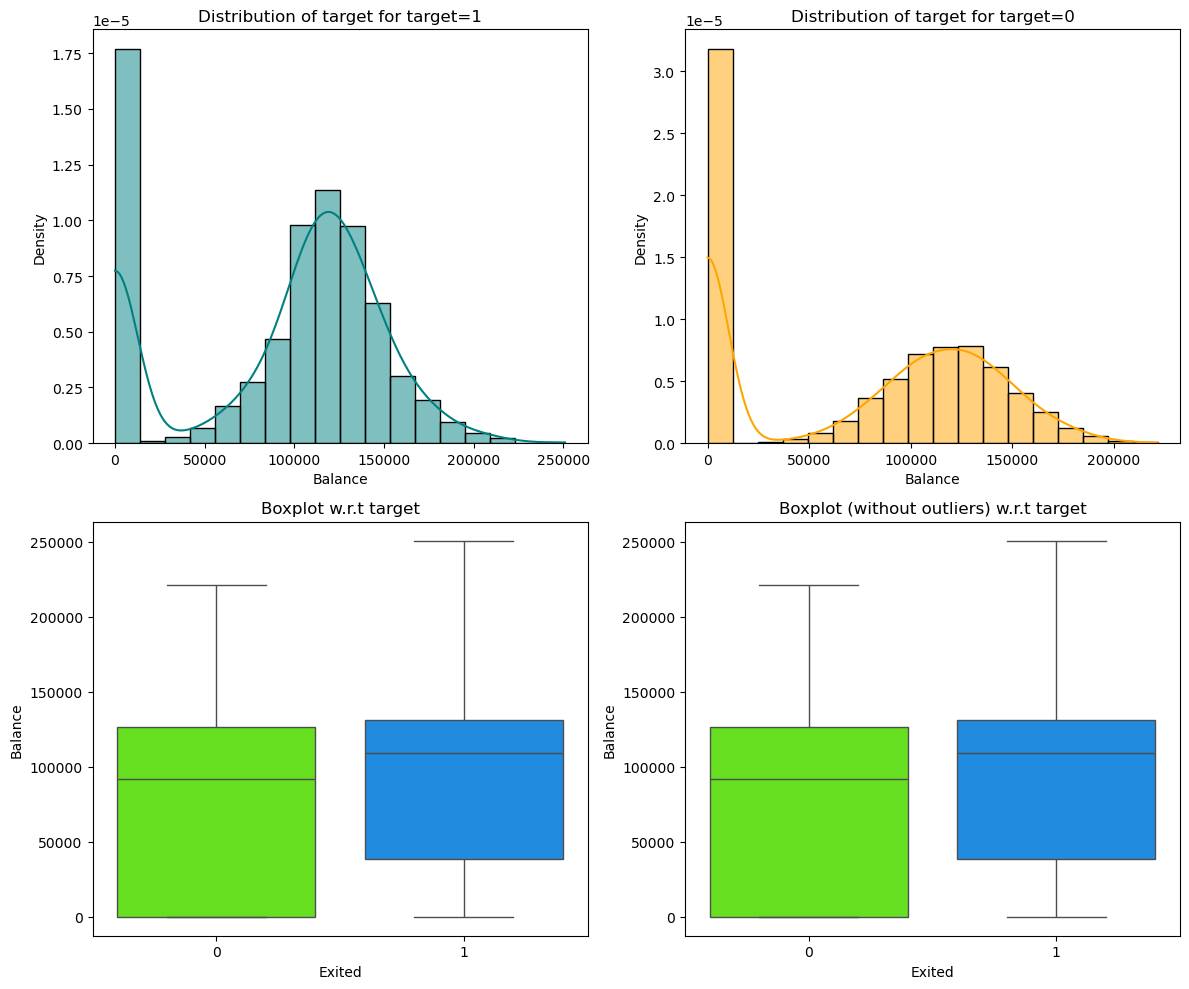

In [4110]:
distribution_plot_wrt_target(df, "Balance", "Exited" )

- The average balance of those who exited is slightly above 100000 and those who did not is slightly below 100000.
- 75% of those who exited had a balance roughly between 40000 and 125000.
- 75% of those who did not exit within the six month period has a balance roughly between 0 and 124000.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


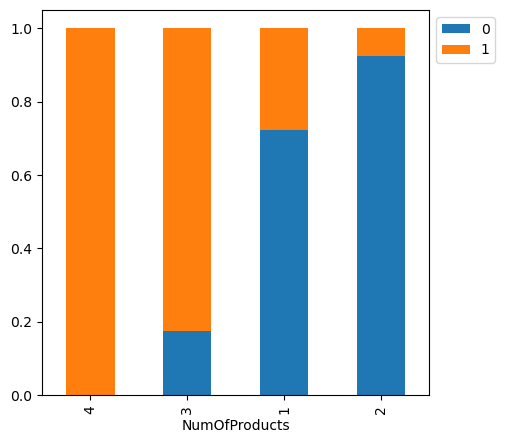

In [4113]:
stacked_barplot(df, "NumOfProducts", "Exited" )

- Those with 4 products seem to have the highest percentage of customers who exited within the six month period (all 60 customers who had 4 products exited!), followed by those with 3 products.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


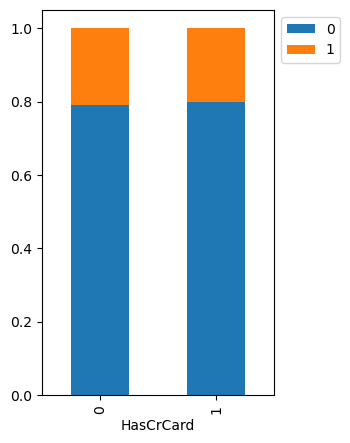

In [4116]:
stacked_barplot(df, "HasCrCard", "Exited" )

- Whether the custimer has a credit card or not does not seem to have an effect of the customer exiting within the six month period.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


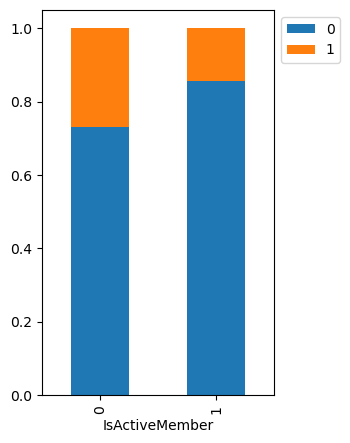

In [4119]:
stacked_barplot(df, "IsActiveMember", "Exited" )

- The percentage of those who exited within the six month period is higher for inactive members.

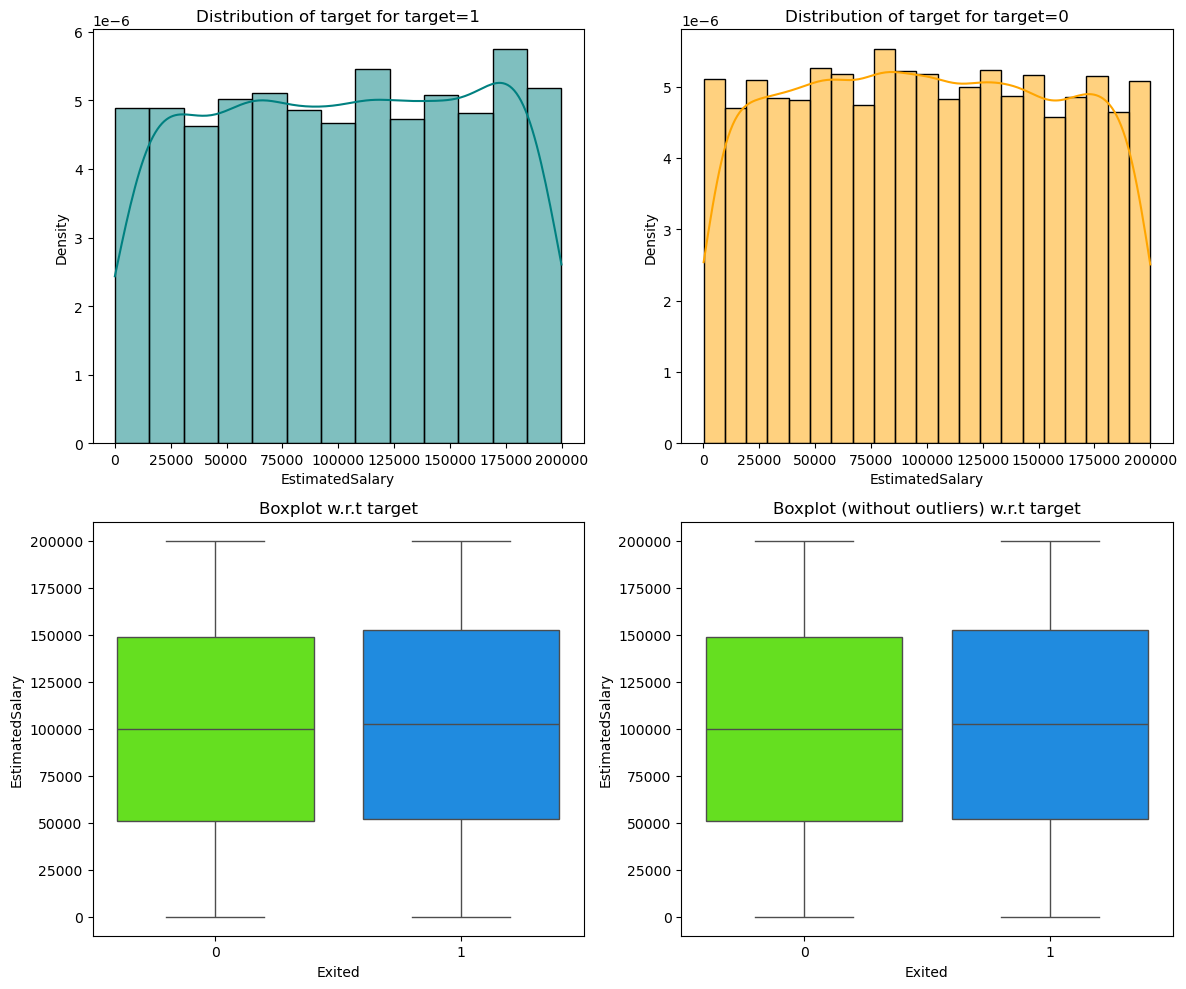

In [4122]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited" )

- The average estimated salary for customers who exited and who did not is the same.

## Data Preprocessing

In [4126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4128]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [4130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4132]:
X = df.drop(['Exited'],axis=1) # X inputs excluding target variable
y = df['Exited'] # y = target variable

### Dummy Variable Creation

In [4135]:
#Using one-hot-encoding to encode Geography and Gender. HasCrCard and IsActiveMember need not be encoded since the values are either 0 or 1.
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
X = X.astype(float)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0


### Train-validation-test Split

In [4138]:
# Splitting the dataset into train, validation and test data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)
# 80% of the data is set for training, remaining 20% is split in a 4:1 ratio for validation and test split
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.25,random_state=1,stratify=y_val
)

In [4140]:
X_train.shape

(8000, 11)

In [4142]:
X_val.shape

(1500, 11)

In [4144]:
X_test.shape

(500, 11)

### Data Normalization

In [4147]:
# Since the data have different ranges, data need to be normalized to avoid bias towards the larger values
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
# Using sc.transform to transform the validation data using the mean and sd obtained from training data.
X_val[cols_list] = sc.transform(X_val[cols_list])    
# Using sc.transform to transform the test data using the mean and sd obtained from training data.
X_test[cols_list] = sc.transform(X_test[cols_list])    

## Model Building

### Model Evaluation Criterion

- We want to understand why the customers leave within six months and focus efforts to improve retention. The best metric in this scenario would be Recall since we want to make sure we catch all positives and avoid false negatives. 


In [4152]:
#Defining the metric that will be used in all models
metric = keras.metrics.Recall()

In [4154]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [4156]:
# function to compute different metrics to check performance of a classification model built
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [4158]:
# Calculating class weights since there data is imbalanced and bias needs 
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [4160]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [4167]:
# Creating dataframes to store the metrics from each model
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [4170]:
# Clearing the backend so that there is no remnant data and we start with a clean space.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [4172]:
#Initializing the neural network
model_1 = Sequential()
# input layer(s) using relu as activation function
model_1.add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
model_1.add(Dense(70, activation='relu'))
# output layer
model_1.add(Dense(1, activation = 'sigmoid'))

In [4174]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 70)             │         9,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637 (41.55 KB)

 Trainable params: 10,637 (41.55 KB)

 Non-trainable params: 0 (0.00 B)

In [4176]:
# defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD()    
# compiling trhe model
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [4178]:
start = time.time()
history_1 = model_1.fit(X_train, 
                        y_train, 
                        validation_data=(X_val,y_val) , 
                        batch_size=250, # batch size of 250 with epoch set to 55 seemed to give better results
                        epochs=55,
                        class_weight=cw_dict)
end=time.time()

Epoch 1/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.4133 - recall: 0.0595 - val_loss: 0.6656 - val_recall: 0.2459
Epoch 2/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3611 - recall: 0.3008 - val_loss: 0.6638 - val_recall: 0.5541
Epoch 3/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.3273 - recall: 0.5361 - val_loss: 0.6537 - val_recall: 0.6590
Epoch 4/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2991 - recall: 0.6294 - val_loss: 0.6412 - val_recall: 0.6918
Epoch 5/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2743 - recall: 0.6504 - val_loss: 0.6287 - val_recall: 0.7082
Epoch 6/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2521 - recall: 0.6555 - val_loss: 0.6172 - val_recall: 0.7148
Epoch 7/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2329 - recall: 0.6631 - val_loss: 0.6075 - val_recall: 0.7148
Epoch 8/55
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2166 - recall: 0.6618 - val_loss: 0.5994 - val_recall: 0.7180
Epoch 9/55
32/32 ━━━━━━

In [4180]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.658462047576904


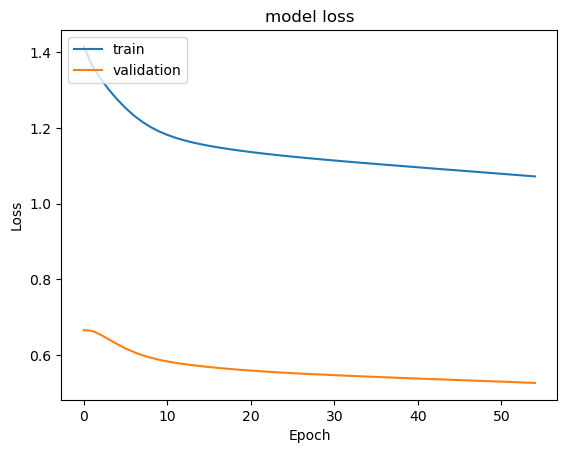

In [4182]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4184]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.728875,0.728875,0.811074,0.752109


In [4186]:
model_1_valid_perf = model_performance_classification(model_1, X_val, y_val)
model_1_valid_perf

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.727333,0.727333,0.811109,0.750913


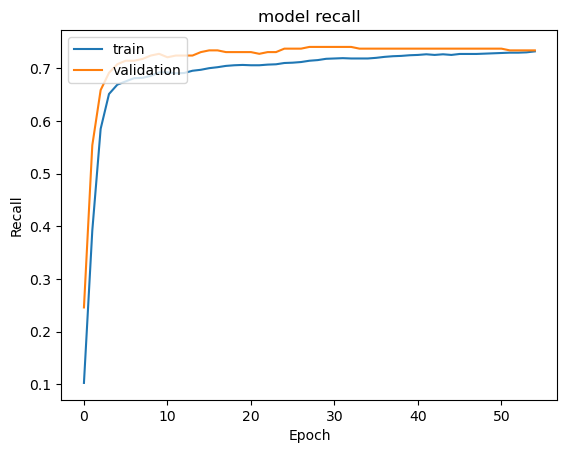

In [4188]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4196]:
# Predicting for training data, anything above 0.5 will be considered 1 and below will be considered 0.
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [4198]:
# Predicting for validation data
y_val_pred = model_1.predict(X_val)    
y_val_pred = (y_val_pred > 0.5)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [4202]:
# Adding metric values to the dataframes
model_name = "SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [4204]:
#lassification report for training data
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      6370
           1       0.41      0.73      0.52      1630

    accuracy                           0.73      8000
   macro avg       0.66      0.73      0.67      8000
weighted avg       0.81      0.73      0.75      8000



In [4206]:
#classification report for validation data
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1195
           1       0.41      0.73      0.52       305

    accuracy                           0.73      1500
   macro avg       0.66      0.73      0.67      1500
weighted avg       0.81      0.73      0.75      1500



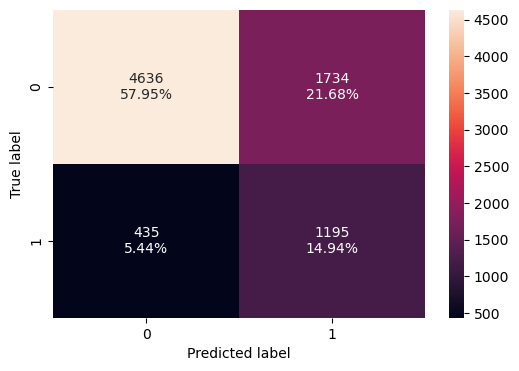

In [4208]:
make_confusion_matrix(y_train, y_train_pred)

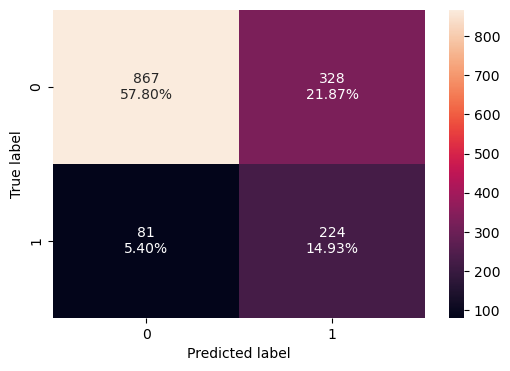

In [4210]:
make_confusion_matrix(y_val, y_val_pred) 

- 57.80 + 14.93 = 72.73% of validation data is correctly predicted.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [4239]:
backend.clear_session()
#Fixing the seed for random number generators to ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [4241]:
#Initializing the neural network
model_2 = Sequential()
# input layer(s) using relu as activation function
# tried various values for number of neurons and layers based of resulting graph for loss and recall; eventually set to the values below.
model_2.add(Dense(12, activation='relu', input_dim = X_train.shape[1]))
model_2.add(Dense(2, activation='relu'))
# output layer
model_2.add(Dense(1, activation = 'sigmoid'))

In [4243]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

In [4245]:
# Compiling the model with loss function = binary cross entropy and metric - recall
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [4247]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            26 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

In [4249]:
# Fitting the model, using batch size 50 and epoch 25 after trying out various combinations.
# Setting the class_weight parameter since the data is imbalanced.
history_2 = model_2.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    batch_size=50,
    epochs=25,
    class_weight=cw_dict
)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3496 - recall: 0.3954 - val_loss: 0.6056 - val_recall: 0.5279
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2578 - recall: 0.5637 - val_loss: 0.5725 - val_recall: 0.6918
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1793 - recall: 0.6869 - val_loss: 0.5669 - val_recall: 0.7311
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1622 - recall: 0.6932 - val_loss: 0.5652 - val_recall: 0.7443
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1537 - recall: 0.6876 - val_loss: 0.5639 - val_recall: 0.7475
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1474 - recall: 0.6943 - val_loss: 0.5638 - val_recall: 0.7475
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1423 - recall: 0.7003 - val_loss: 0.5621 - val_recall: 0.7475
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1376 - recall: 0.7021 - val_loss: 0.5608 - val_recall: 0.7508
Epoch 9/

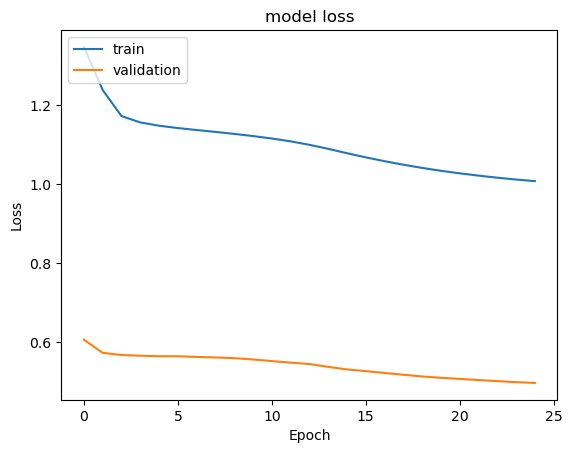

In [4251]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

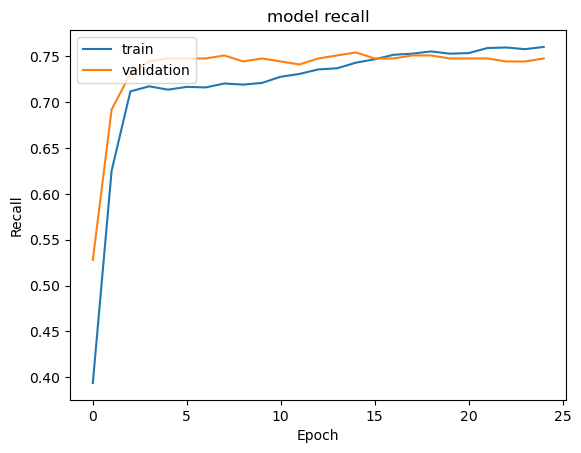

In [4253]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4255]:
#Predicting training results
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [4257]:
#Predicting validation results
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [4259]:
# Adding metric values to the dataframes
model_name = "Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [4265]:
# Classification report for training data
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      6370
           1       0.44      0.76      0.56      1630

    accuracy                           0.76      8000
   macro avg       0.68      0.76      0.70      8000
weighted avg       0.83      0.76      0.78      8000



In [4267]:
# Classification report for validation data
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1195
           1       0.44      0.75      0.56       305

    accuracy                           0.76      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.82      0.76      0.78      1500



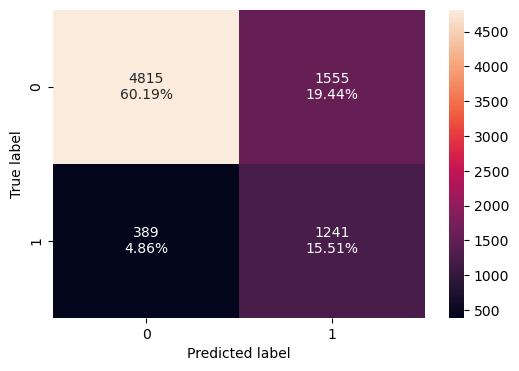

In [4269]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

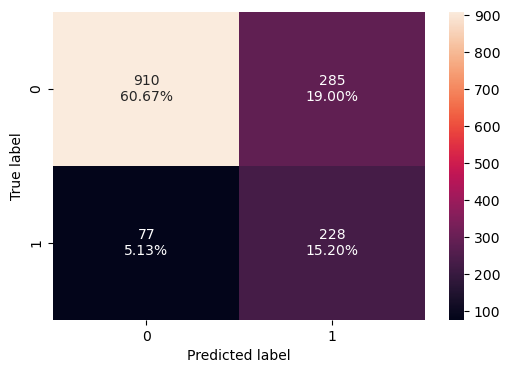

In [4271]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred) 

- 75.87% of the validation data is predicted correctly.

### Neural Network with Adam Optimizer and Dropout

In [4805]:
# Clearing the backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [4806]:
#Initializing the neural network
model_3 = Sequential()
# input layer(s) using relu as activation function
#Settling for these values after trying out various combinations depending on loss and recall graph. 
# P.S. The current recall graph shows underfitting, will need to try adding more neurons or hidden layers to increase complexity. 
# Stopping due to lack of time and changes tried to the model is not giving better performance.
model_3.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_3.add(Dropout(0.2))
model_3.add(Dense(12, activation='relu'))
# output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [4809]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00008)

In [4811]:
## Compiling the model with binary cross entropy as loss function and recall metric.
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [4813]:
# Summary of the model
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,561 (6.10 KB)

 Trainable params: 1,561 (6.10 KB)

 Non-trainable params: 0 (0.00 B)

In [4815]:
#Fitting the model 
history_3 = model_3.fit(
    X_train,y_train,
    batch_size=150,  
    epochs=50, 
    class_weight=cw_dict,
    validation_data=(X_val,y_val)
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.3955 - recall: 0.4842 - val_loss: 0.6822 - val_recall: 0.3639
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3824 - recall: 0.3729 - val_loss: 0.6775 - val_recall: 0.4393
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3662 - recall: 0.4067 - val_loss: 0.6713 - val_recall: 0.4885
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3507 - recall: 0.4739 - val_loss: 0.6656 - val_recall: 0.5738
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3343 - recall: 0.4841 - val_loss: 0.6597 - val_recall: 0.6328
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3256 - recall: 0.5201 - val_loss: 0.6536 - val_recall: 0.6656
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3163 - recall: 0.5404 - val_loss: 0.6461 - val_recall: 0.6754
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3028 - recall: 0.5629 - val_loss: 0.6388 - val_recall: 0.6754
Epoch 9/50
54/54 ━━━━━━

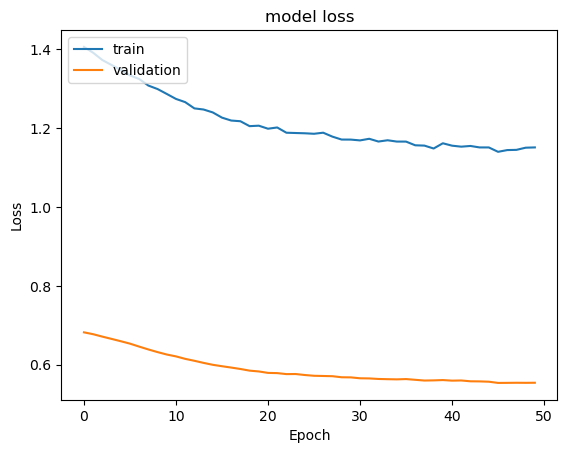

In [4816]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

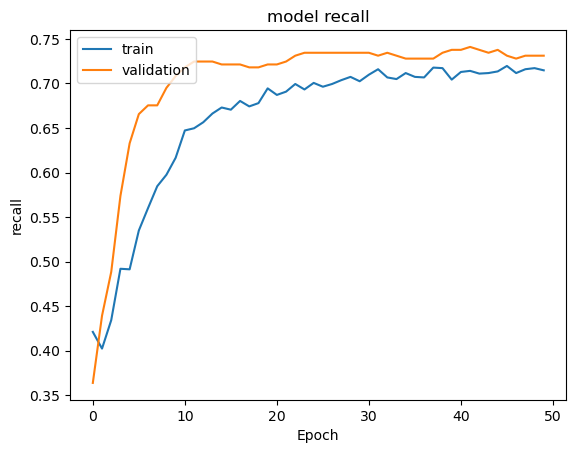

In [4819]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4821]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [4822]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [4825]:
# Adding metric values to the dataframes
model_name = "Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [4827]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      6370
           1       0.39      0.74      0.51      1630

    accuracy                           0.71      8000
   macro avg       0.65      0.72      0.66      8000
weighted avg       0.81      0.71      0.74      8000



In [4829]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1195
           1       0.39      0.73      0.51       305

    accuracy                           0.71      1500
   macro avg       0.65      0.72      0.65      1500
weighted avg       0.80      0.71      0.74      1500



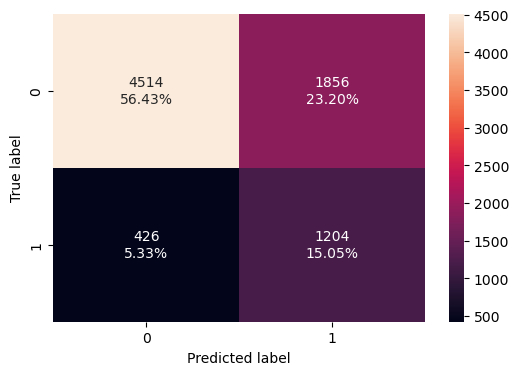

In [4831]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

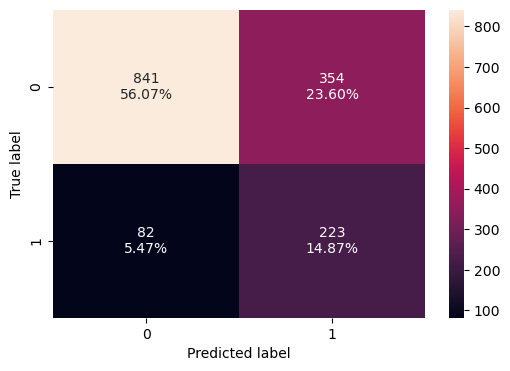

In [4833]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  

- 70.94% of the validation data is predicted correctly.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [4416]:
sm  = SMOTE(random_state=1)
#Using SMOTE to oversample data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (12740, 11)
After UpSampling, the shape of train_y: (12740,) 



In [4418]:
# Checking count of both 0 and 1 values in training data target variable  
y_train_smote.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [4420]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [4422]:
#Initializing the neural network
model_4 = Sequential()
# input layer(s) using relu as activation function
model_4.add(Dense(128, activation='relu', input_dim = X_train_smote.shape[1]))
model_4.add(Dense(70, activation='relu'))
# output layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [4424]:
# Using SGD as optimizer
optimizer = tf.keras.optimizers.SGD()

In [4426]:
# Compiling the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [4428]:
#Fitting the ANN
history_4 = model_4.fit(
    X_train_smote, y_train_smote,
    batch_size=250, 
    epochs=45, 
    validation_data = (X_val,y_val)
)

Epoch 1/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7142 - recall: 0.1406 - val_loss: 0.6599 - val_recall: 0.1410
Epoch 2/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6896 - recall: 0.2290 - val_loss: 0.6608 - val_recall: 0.4262
Epoch 3/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6731 - recall: 0.4835 - val_loss: 0.6541 - val_recall: 0.5869
Epoch 4/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6593 - recall: 0.6027 - val_loss: 0.6443 - val_recall: 0.6393
Epoch 5/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6469 - recall: 0.6492 - val_loss: 0.6336 - val_recall: 0.6721
Epoch 6/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6356 - recall: 0.6679 - val_loss: 0.6228 - val_recall: 0.6852
Epoch 7/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6251 - recall: 0.6820 - val_loss: 0.6127 - val_recall: 0.6852
Epoch 8/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6156 - recall: 0.6892 - val_loss: 0.6036 - val_recall: 0.6951
Epoch 9/45
51/51 ━━━━━━

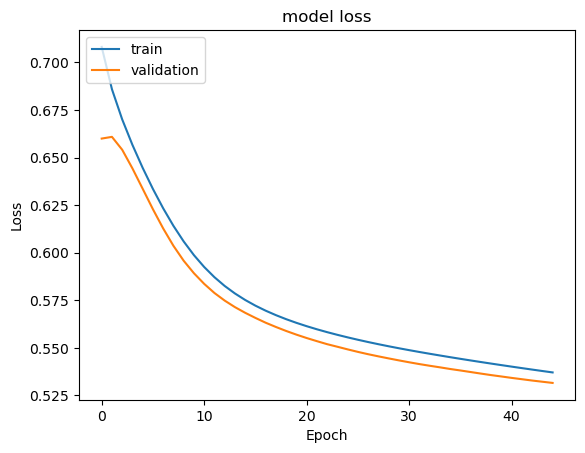

In [4430]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

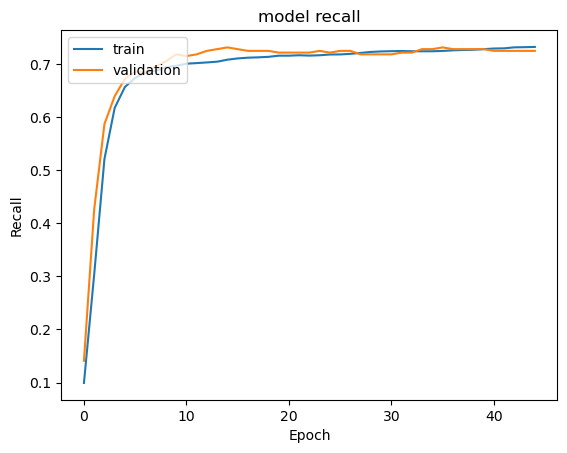

In [4432]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4434]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [4436]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [4438]:
model_name = "SMOTE and SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [4440]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6370
           1       0.73      0.73      0.73      6370

    accuracy                           0.73     12740
   macro avg       0.73      0.73      0.73     12740
weighted avg       0.73      0.73      0.73     12740



In [4442]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1195
           1       0.40      0.72      0.52       305

    accuracy                           0.73      1500
   macro avg       0.66      0.73      0.66      1500
weighted avg       0.81      0.73      0.75      1500



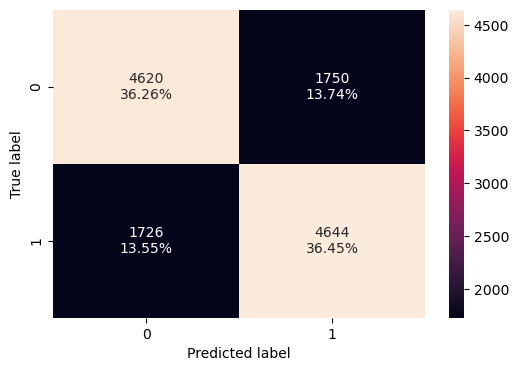

In [4444]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

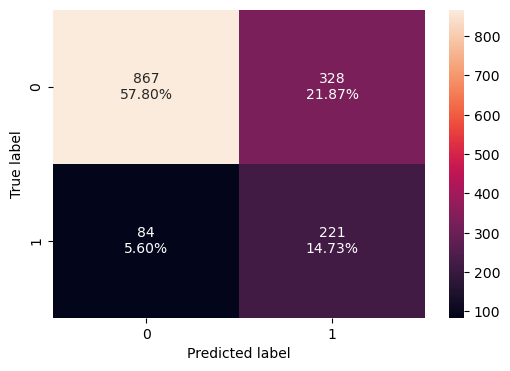

In [4446]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

- 72.53% of validation data is predicted correctly.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [4449]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [4451]:
#Initializing the model
model_5 = Sequential()
# Adding hidden layers and output layer
model_5.add(Dense(14,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(Dense(6,activation='relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

In [4453]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

In [4455]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [4457]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265 (1.04 KB)

 Trainable params: 265 (1.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4459]:
#Fitting the ANN

history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=500, 
    epochs=14,  
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.7469 - recall: 0.1064 - val_loss: 0.6387 - val_recall: 0.0852
Epoch 2/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7088 - recall: 0.1271 - val_loss: 0.6483 - val_recall: 0.2393
Epoch 3/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6875 - recall: 0.2504 - val_loss: 0.6375 - val_recall: 0.2984
Epoch 4/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6693 - recall: 0.3224 - val_loss: 0.6148 - val_recall: 0.4393
Epoch 5/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6498 - recall: 0.4685 - val_loss: 0.5896 - val_recall: 0.5508
Epoch 6/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6279 - recall: 0.6091 - val_loss: 0.5720 - val_recall: 0.6361
Epoch 7/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6042 - recall: 0.6831 - val_loss: 0.5697 - val_recall: 0.6885
Epoch 8/14
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5808 - recall: 0.7231 - val_loss: 0.5646 - val_recall: 0.7082
Epoch 9/14
26/26 ━━━━━

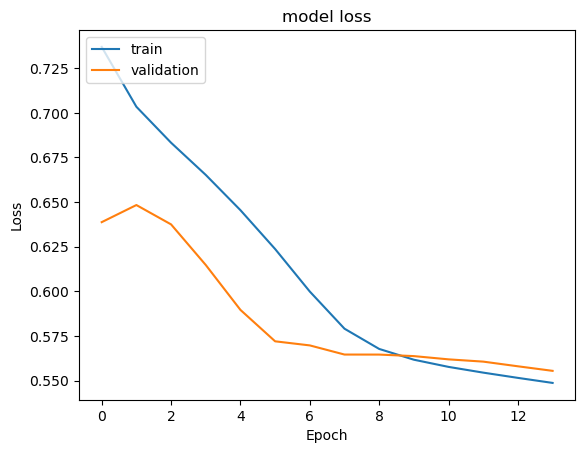

In [4461]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

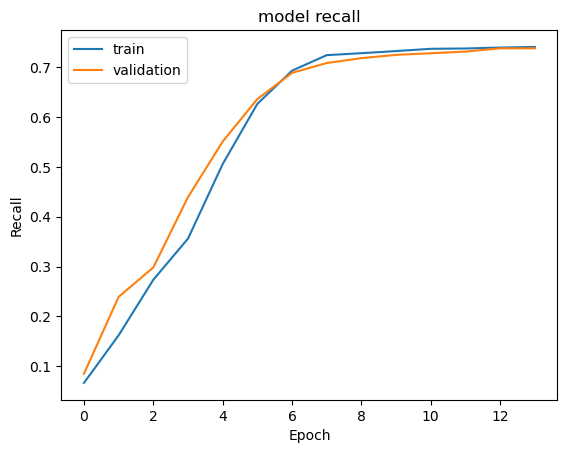

In [4463]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4465]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [4467]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [4469]:
# Adding metric values to the dataframes
model_name = "SMOTE and Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [4471]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      6370
           1       0.72      0.75      0.73      6370

    accuracy                           0.72     12740
   macro avg       0.73      0.72      0.72     12740
weighted avg       0.73      0.72      0.72     12740



In [4473]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1195
           1       0.39      0.74      0.51       305

    accuracy                           0.71      1500
   macro avg       0.65      0.72      0.65      1500
weighted avg       0.81      0.71      0.74      1500



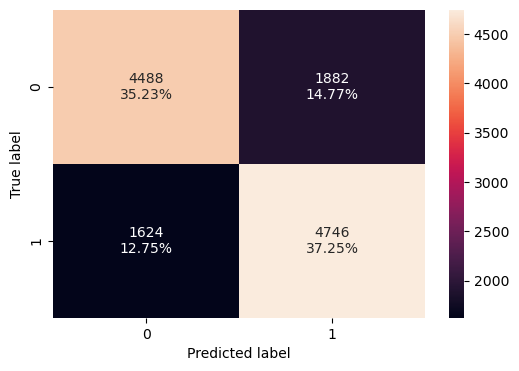

In [4477]:
#Calculating the confusion matrix for training data
make_confusion_matrix(y_train_smote, y_train_pred)

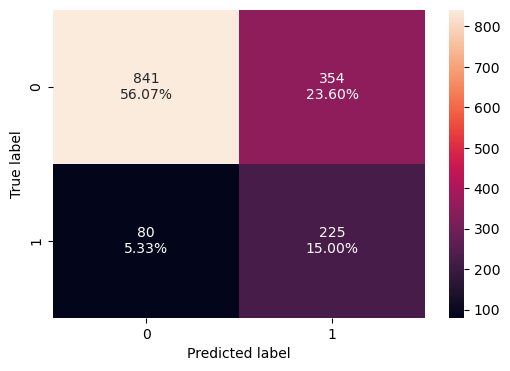

In [4479]:
#Calculating the confusion matrix for validation data
make_confusion_matrix(y_val, y_val_pred)

- 71.07% of the validation data is correctly predicted.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [4515]:
# Clearing the backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [4516]:
#Initializing the model
model_6 = Sequential()
model_6.add(Dense(20,activation='relu', input_dim = X_train_smote.shape[1]))
model_6.add(Dropout(0.2))
model_6.add(Dense(10,activation='relu'))
#model_6.add(Dropout(0.3))
#model_6.add(Dense(2,activation='relu'))
model_6.add(Dense(1, activation = 'sigmoid'))

In [4523]:
#Using Adam as the optimizer and setting learning rate to try to make the graph smooth.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [4525]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [4527]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

In [4529]:
#Fitting the ANN

history_6 = model_6.fit(
    X_train_smote,y_train_smote,
    batch_size=120, 
    epochs=85,  
    validation_data = (X_val,y_val)
)

Epoch 1/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7110 - recall: 0.2168 - val_loss: 0.6478 - val_recall: 0.2131
Epoch 2/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6987 - recall: 0.2005 - val_loss: 0.6468 - val_recall: 0.3180
Epoch 3/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6895 - recall: 0.2706 - val_loss: 0.6451 - val_recall: 0.3934
Epoch 4/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6823 - recall: 0.3394 - val_loss: 0.6420 - val_recall: 0.4787
Epoch 5/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6740 - recall: 0.4073 - val_loss: 0.6387 - val_recall: 0.5574
Epoch 6/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6696 - recall: 0.4419 - val_loss: 0.6363 - val_recall: 0.6033
Epoch 7/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6638 - recall: 0.4809 - val_loss: 0.6331 - val_recall: 0.6361
Epoch 8/85
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6559 - recall: 0.5177 - val_loss: 0.6288 - val_recall: 0.6590
Epoch 9/

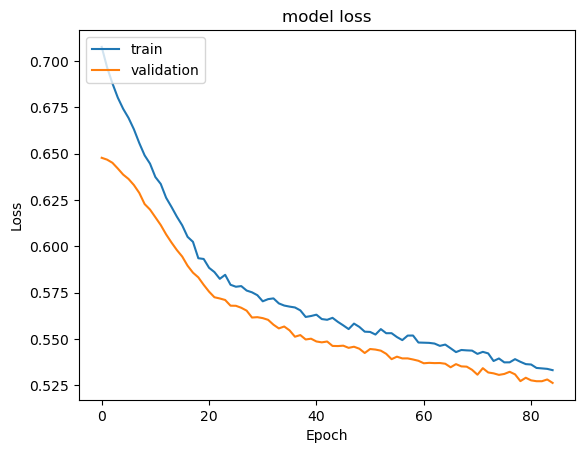

In [4531]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

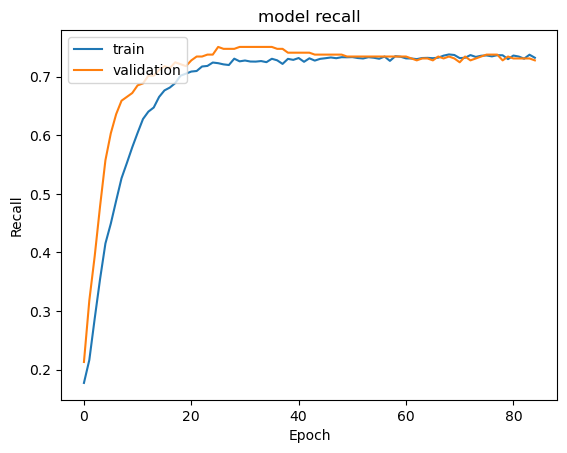

In [4533]:
#Plotting Train recall vs Validation recall
plt.plot(history_6.history['recall'])
plt.plot(history_6.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [4535]:
y_train_pred = model_6.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [4537]:
y_val_pred = model_6.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [4539]:
# Adding metric values to the dataframes
model_name = "SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [4541]:
#classification report for training data
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      6370
           1       0.74      0.75      0.75      6370

    accuracy                           0.75     12740
   macro avg       0.75      0.75      0.75     12740
weighted avg       0.75      0.75      0.75     12740



In [4543]:
#classification report for validation data
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1195
           1       0.43      0.73      0.54       305

    accuracy                           0.75      1500
   macro avg       0.67      0.74      0.68      1500
weighted avg       0.82      0.75      0.77      1500



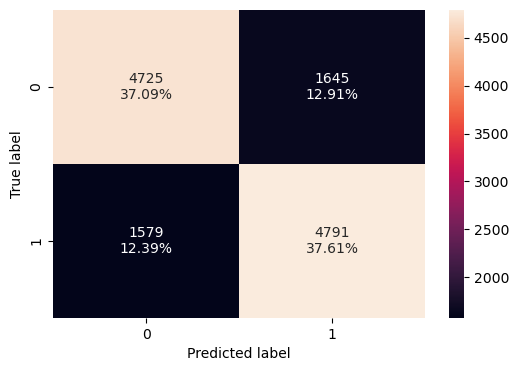

In [4545]:
#Calculating the confusion matrix for training data
make_confusion_matrix(y_train_smote, y_train_pred)

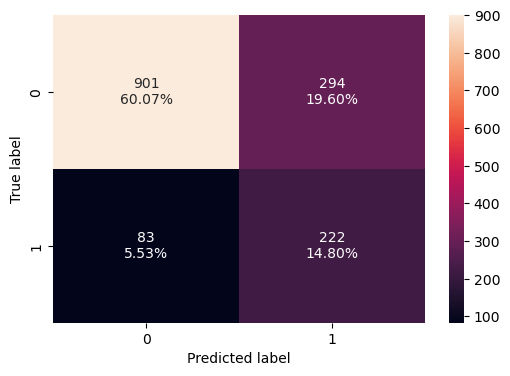

In [4547]:
#Calculating the confusion matrix for validation data
make_confusion_matrix(y_val,y_val_pred)

- 74.87% of validation data is predicted correctly.

## Model Performance Comparison and Final Model Selection

In [4835]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
SGD,0.733129
Adam,0.761350
SMOTE and SGD,0.729042
SMOTE and Adam,0.745055
"SMOTE,Adam & Dropout",0.752119
Adam & Dropout,0.738650


In [4837]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
SGD,0.734426
Adam,0.747541
SMOTE and SGD,0.724590
SMOTE and Adam,0.737705
"SMOTE,Adam & Dropout",0.727869
Adam & Dropout,0.731148


In [4839]:
# Difference between training performance and validation performance
train_metric_df - valid_metric_df

,recall
SGD,-0.001297
Adam,0.013809
SMOTE and SGD,0.004452
SMOTE and Adam,0.007350
"SMOTE,Adam & Dropout",0.024250
Adam & Dropout,0.007503


- From the models above, model_1 using the SGD optimization with class_weights parameter is the one that has performed the best. Using model_1 to test the test data.

In [4844]:
# Testing model_1 on test data
y_test_pred = model_1.predict(X_test)    
y_test_pred = (y_test_pred > 0.5)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [4846]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       398
           1       0.40      0.71      0.51       102

    accuracy                           0.72       500
   macro avg       0.65      0.72      0.66       500
weighted avg       0.80      0.72      0.75       500



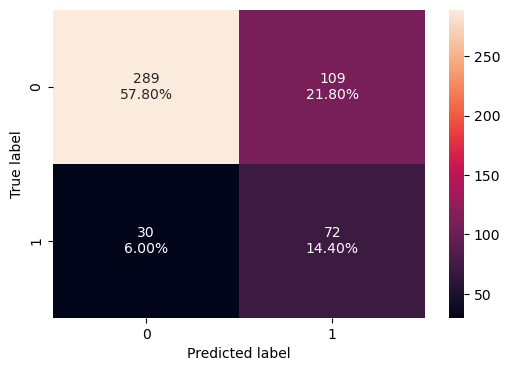

In [4848]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

- 72.2% of test data is predicted correctly. The performance is similar to that of training and validation data.
- f1 score of about 72% suggests moderate performance
- models can be tuned further using weight initializations, changing neurons and hidden layers etc.

## Actionable Insights and Business Recommendations

* The final model can be deployed at the bank to identify, with about 72% accuracy, if the customer will stay with the bank or exit within six months.
* Offering more than 3 products to the same customer may need to be looked into, since all customers with 4 products exited within 6 months.
* The bank can provide incentives to attract customers in the 30-40 year age group since that age group seems to stay with the bank.
* The bank could provide a survey to customers in Germany to identify their pain points or reasons for exiting since Germany seems to have the highest percentage of customers who exited the bank within six months.


___